In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit(['LAG', 'YFT', 'OTHER', 'DOL', 'SHARK', 'NoF', 'BET', 'ALB'])

In [3]:
print('Data Exploration')
import os, os.path
num_images ={} #list of dictionary containing the number of fishes along with their label for eg: 'ALB': 1719, 'BET':200
for j in ['LAG', 'YFT', 'OTHER', 'DOL', 'SHARK', 'NoF', 'BET', 'ALB']:
    DIR = './Dataset/train/'+j
    num_images[j] = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

Data Exploration


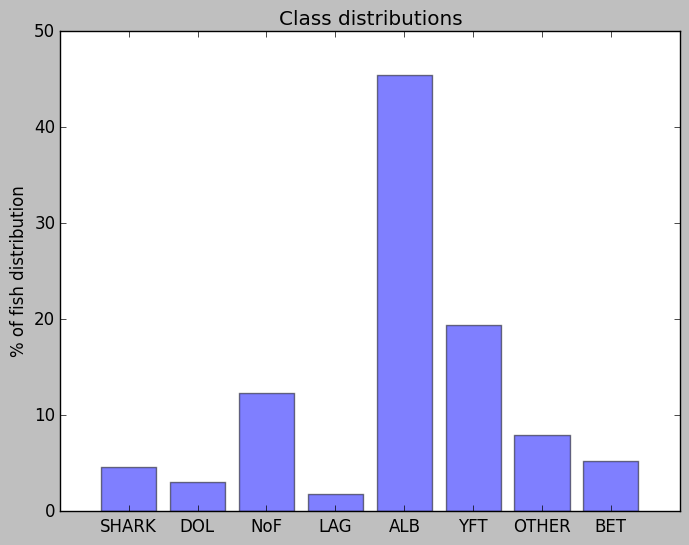

In [4]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = num_images.keys() #fish_labels
y_pos = np.arange(len(objects))
performance = num_images.values()/(sum(num_images.values())*1.0)*100 #fish_numbers
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('% of fish distribution')
plt.title('Class distributions')
 
plt.show()

### The data distribution is highly unbalanced. ALB(1719 images) contains approximately half of the dataset (45%), where as LAG and DOL accounts for less than 5%. Therefore, we have to be careful while splitting our training dataset, so that our model can classify the less representative data too. 

In [5]:
import numpy as np

import os
import glob
import cv2
import math
import pickle
import datetime
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, \
                                       ZeroPadding2D

# from keras.layers.normalization import BatchNormalization
# from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import model_from_json
# from sklearn.metrics import log_loss
from numpy.random import permutation

Using Theano backend.


In [6]:
np.random.seed(2016)
use_cache = 1
# color type: 1 - grey, 3 - rgb
color_type = 3
img_rows = 224
img_cols = 224

In [7]:
def get_im(path, img_rows, img_cols, color_type=3):
    # Load as color
    #if color_type == 1:
    #    img = Image.open(path, 0)
    #elif color_type == 3:
    img = cv2.imread(path)
    # Reduce size
    resized = cv2.resize(img, (img_cols, img_rows))
    # mean_pixel = [103.939, 116.799, 123.68]
    # resized = resized.astype(np.float32, copy=False)

    # for c in range(3):
    #    resized[:, :, c] = resized[:, :, c] - mean_pixel[c]
    # resized = resized.transpose((2, 0, 1))
    # resized = np.expand_dims(img, axis=0)
    return resized

In [8]:

X_train = []
y_train = []
print('Read train images')
for j in ['LAG', 'YFT', 'OTHER', 'DOL', 'SHARK', 'NoF', 'BET', 'ALB']:
    print('Load folder {}'.format(j))
    path = os.path.join('./Dataset/train/',j, '*.jpg')
    files = glob.glob(path)
    for fl in files:
        flbase = os.path.basename(fl)
        img = get_im(fl, img_rows, img_cols, color_type)
        X_train.append(img)
        y_train.append(j)
y_train = le.transform(y_train)
    

Read train images
Load folder LAG
Load folder YFT
Load folder OTHER
Load folder DOL
Load folder SHARK
Load folder NoF
Load folder BET
Load folder ALB


In [15]:
y_train[1617]

4

In [71]:
X_trainset = X_train[:]
y_trainset = y_train[:]
#X_trainset = [(np.asarray(X_train[i])) for i in range(len(X_train))]

In [72]:
X_trainset = np.asarray(X_trainset)

In [73]:
X_trainset.shape
#len(y_trainset)

(3777, 224, 224, 3)

In [50]:
from sklearn.cluster import KMeans

In [109]:
X = np.asarray(X_train[:67])

In [113]:
X = X.reshape(67,224*224*3)

In [74]:
y_trainset.shape

(3777,)

In [115]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [116]:
kmeans.labels_

array([9, 5, 2, 4, 5, 9, 6, 4, 5, 0, 1, 0, 6, 3, 2, 5, 5, 0, 3, 8, 1, 5, 1,
       4, 2, 9, 8, 5, 0, 3, 4, 9, 0, 9, 0, 5, 9, 5, 6, 1, 6, 0, 8, 4, 2, 6,
       0, 2, 3, 1, 5, 4, 4, 2, 1, 8, 0, 1, 8, 4, 4, 4, 0, 1, 7, 0, 4], dtype=int32)

### Since many pictures are taken from the same video frames, they lack diversity. 

### Hard to distinguish between "ALB”, “BET” and “YFT”.

### wrong labeled dataset

# Data Augmentation


## Feature Standardization

In [199]:
#X_train[0].shape

(224, 224, 3)

In [200]:
#X_trainset = X_train[:]

In [201]:
#X_trainset = np.asarray(X_trainset)

In [202]:
#X_trainset = X_trainset.astype('float32')

In [66]:
X_trainset[0]

array([[[255, 255, 254],
        [252, 254, 255],
        [253, 255, 253],
        ..., 
        [169, 146, 115],
        [143, 101,  73],
        [123,  88,  59]],

       [[245, 253, 254],
        [251, 250, 240],
        [ 50,  48,  41],
        ..., 
        [165, 155, 121],
        [163, 134, 103],
        [127,  85,  57]],

       [[233, 244, 248],
        [229, 228, 217],
        [ 97,  88,  76],
        ..., 
        [167, 155, 122],
        [170, 150, 117],
        [137,  99,  66]],

       ..., 
       [[ 66,  51,  42],
        [ 76,  66,  49],
        [ 86,  77,  63],
        ..., 
        [ 82,  69,  61],
        [ 83,  71,  61],
        [ 83,  71,  60]],

       [[ 64,  49,  40],
        [ 68,  58,  41],
        [ 82,  73,  58],
        ..., 
        [ 82,  71,  63],
        [ 81,  70,  62],
        [ 81,  71,  61]],

       [[ 65,  50,  41],
        [ 63,  53,  36],
        [ 73,  64,  49],
        ..., 
        [ 83,  74,  65],
        [ 80,  71,  62],
        [ 80,  71,

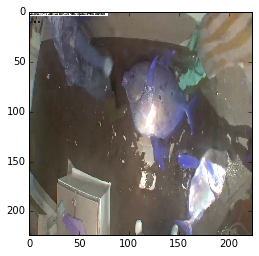

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_trainset[0])

In [167]:
mean_pixel = [103.939, 116.779, 123.68]
for c in range(3):
    X_trainset[:, :, :, c] = X_trainset[:, :, :, c] - mean_pixel[c]

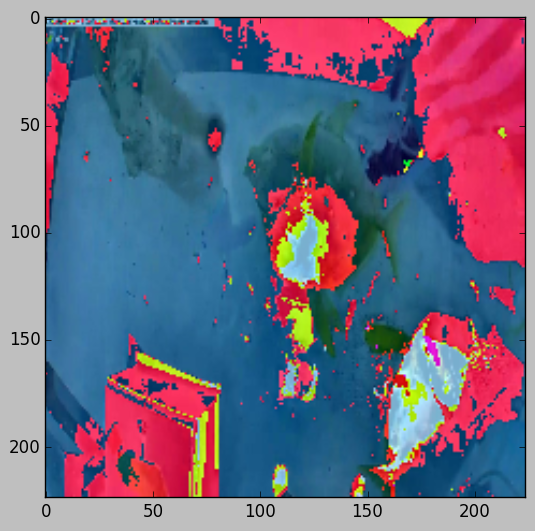

In [168]:
pyplot.imshow(X_trainset[0])

In [43]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_trainset)

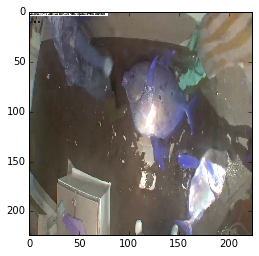

In [44]:
pyplot.imshow(X_trainset[0])

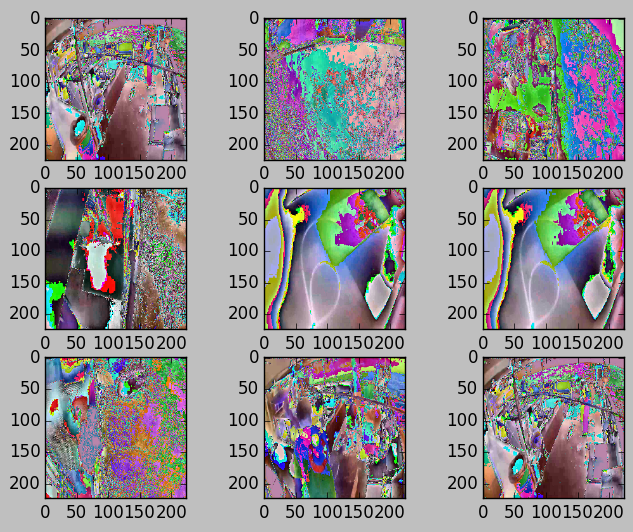

In [179]:
for X_batch, y_batch in datagen.flow(X_trainset, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(224, 224,3), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [180]:
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_trainset)

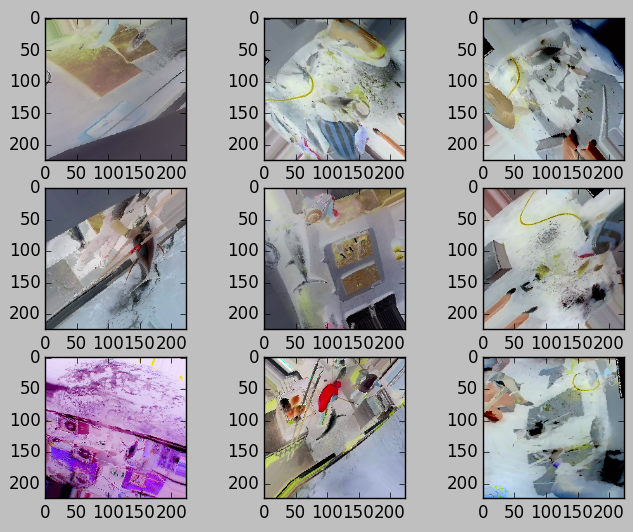

In [181]:
for X_batch, y_batch in datagen.flow(X_trainset, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(224, 224,3), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [76]:
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True,
                             rotation_range=90,
                             horizontal_flip=True, 
                             vertical_flip=True,
                             width_shift_range=0.2, 
                             height_shift_range=0.2)
datagen.fit(X_trainset)
os.makedirs('imagesLAG')
for X_batch, y_batch in datagen.flow(X_trainset, y_trainset, batch_size=3777, save_to_dir='imagesLAG', save_prefix='aug', save_format='jpg'):
	# create a grid of 3x3 images
    for i in range(0,3777):
        pass
    break
    

ValueError: cannot reshape array of size 568544256 into shape (3,244,244)